# Лaбораторная работа № 1

## Гусева Валерия ИУ5-63Б

Датасет: https://www.kaggle.com/spscientist/students-performance-in-exams

## Импорт библиотек

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline 

In [5]:
data = pd.read_csv('StudentsPerformance.csv', sep=",")

## Основные характеристики датасета


### Первые пять строк датасета

In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Размер

In [8]:
data.shape

(1000, 8)

### Колонки их их типы данных

In [10]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Визуальное исследование датасета

<AxesSubplot:xlabel='gender', ylabel='math score'>

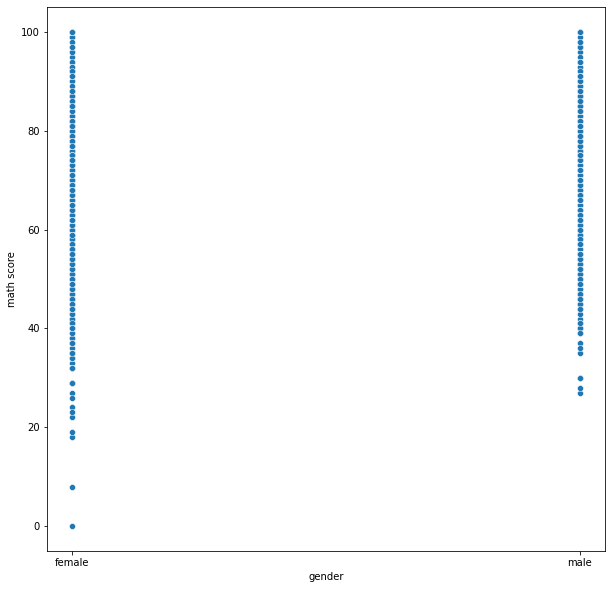

In [16]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='gender', y='math score', data=data)

## Гистограмма

<AxesSubplot:xlabel='gender', ylabel='math score'>

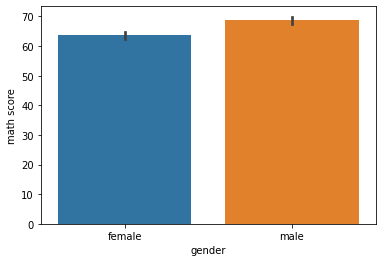

In [18]:
sns.barplot(x=data['gender'], y='math score', data=data)

## Парные диаграммы

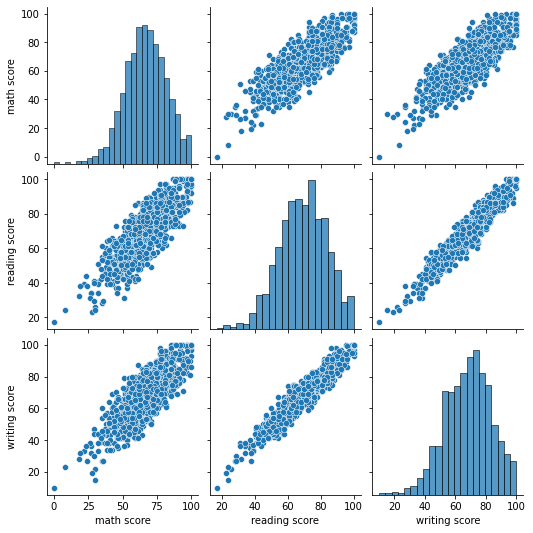

In [19]:
sns.pairplot(data)

## Ящик с усами

Отображает одномерное распределение вероятности.

<AxesSubplot:xlabel='math score'>

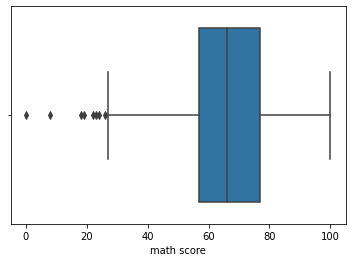

In [20]:
sns.boxplot(x=data['math score'])

## Violin plot

Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности:

<AxesSubplot:xlabel='math score'>

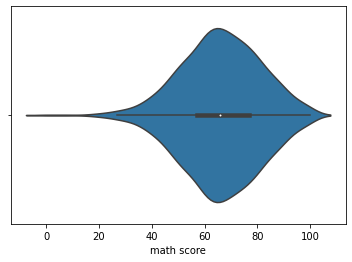

In [21]:
sns.violinplot(x=data['math score'])

## Информация о корреляция признаков

роверка корреляции признаков позволяет решить две задачи:

- Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (колонка "math score"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели.
- Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [22]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен.
Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

<AxesSubplot:>

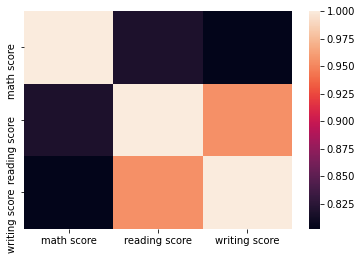

In [23]:
sns.heatmap(data.corr())